# End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

**Objective:** A refresher on EDA covering: data cleaning, basic analysis, feature engineering, and visualization.

---

Importing in all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_theme(style='whitegrid')

print("Imports successful.")

Imports successful.


## Loading the dataset and initial observations:

In [ ]:
# Load the dataset
df = pd.read_csv(r"Titanic-Dataset.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [4]:
df.shape

(891, 12)

In [6]:
print("\nDataset summary:")
df.info()


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looks like there are a lot of missing values for the fields: "Cabin", "Age" and "Embarked"

In [7]:
#understanding numerical features
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Observations:**
- Only about 38.4% of passengers survived.
- The age ranges from ~5 months to 80 years (average age ~30).
- The fare amounts have outliers (avg = 32, but max_fare = 512).

## Data cleaning

In [10]:
print("Missing values before cleaning:")
df.isna().sum()

Missing values before cleaning:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
median = df['Age'].median()
print(median)

28.0


In [12]:
mode = df['Embarked'].mode()[0]
print(mode)

S


Handling the missing values for age:
- median is used to fill missing ages 
- Age distribution can be skewed, we use median since it is not affected by outliers and more accurately represents the most probable age of the passenger


In [13]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Age cleaning:")
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


Handling the missing values for Embarked:
- we use the median since there are only 2 values missing, we'll fill them with the most common embarking port
- Mode is used since this field is a categorical field

In [14]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# Verify that there are no more missing values in the columns we handled so far
print("Missing values after Embarked cleaning:")
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


Handling the "cabin" column:
- Lot of missing values hence, imputing is not a good idea. Let's create a new feature: 'Has_Cabin'.
- 'Has_cabin' values: 1 if has cabin, 0 if not
- This is called "binary encoding" (since we are crating a column which is a BINARY indicator) 

In [15]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [17]:
df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

Let's look at out dataset now:

In [18]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

Look at that clean dataset!

In [19]:
print("Missing values after cleaning:")
df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

## Univariate Analysis

Look at each variable individually to understand its distribution.

Analyzing categorical features:


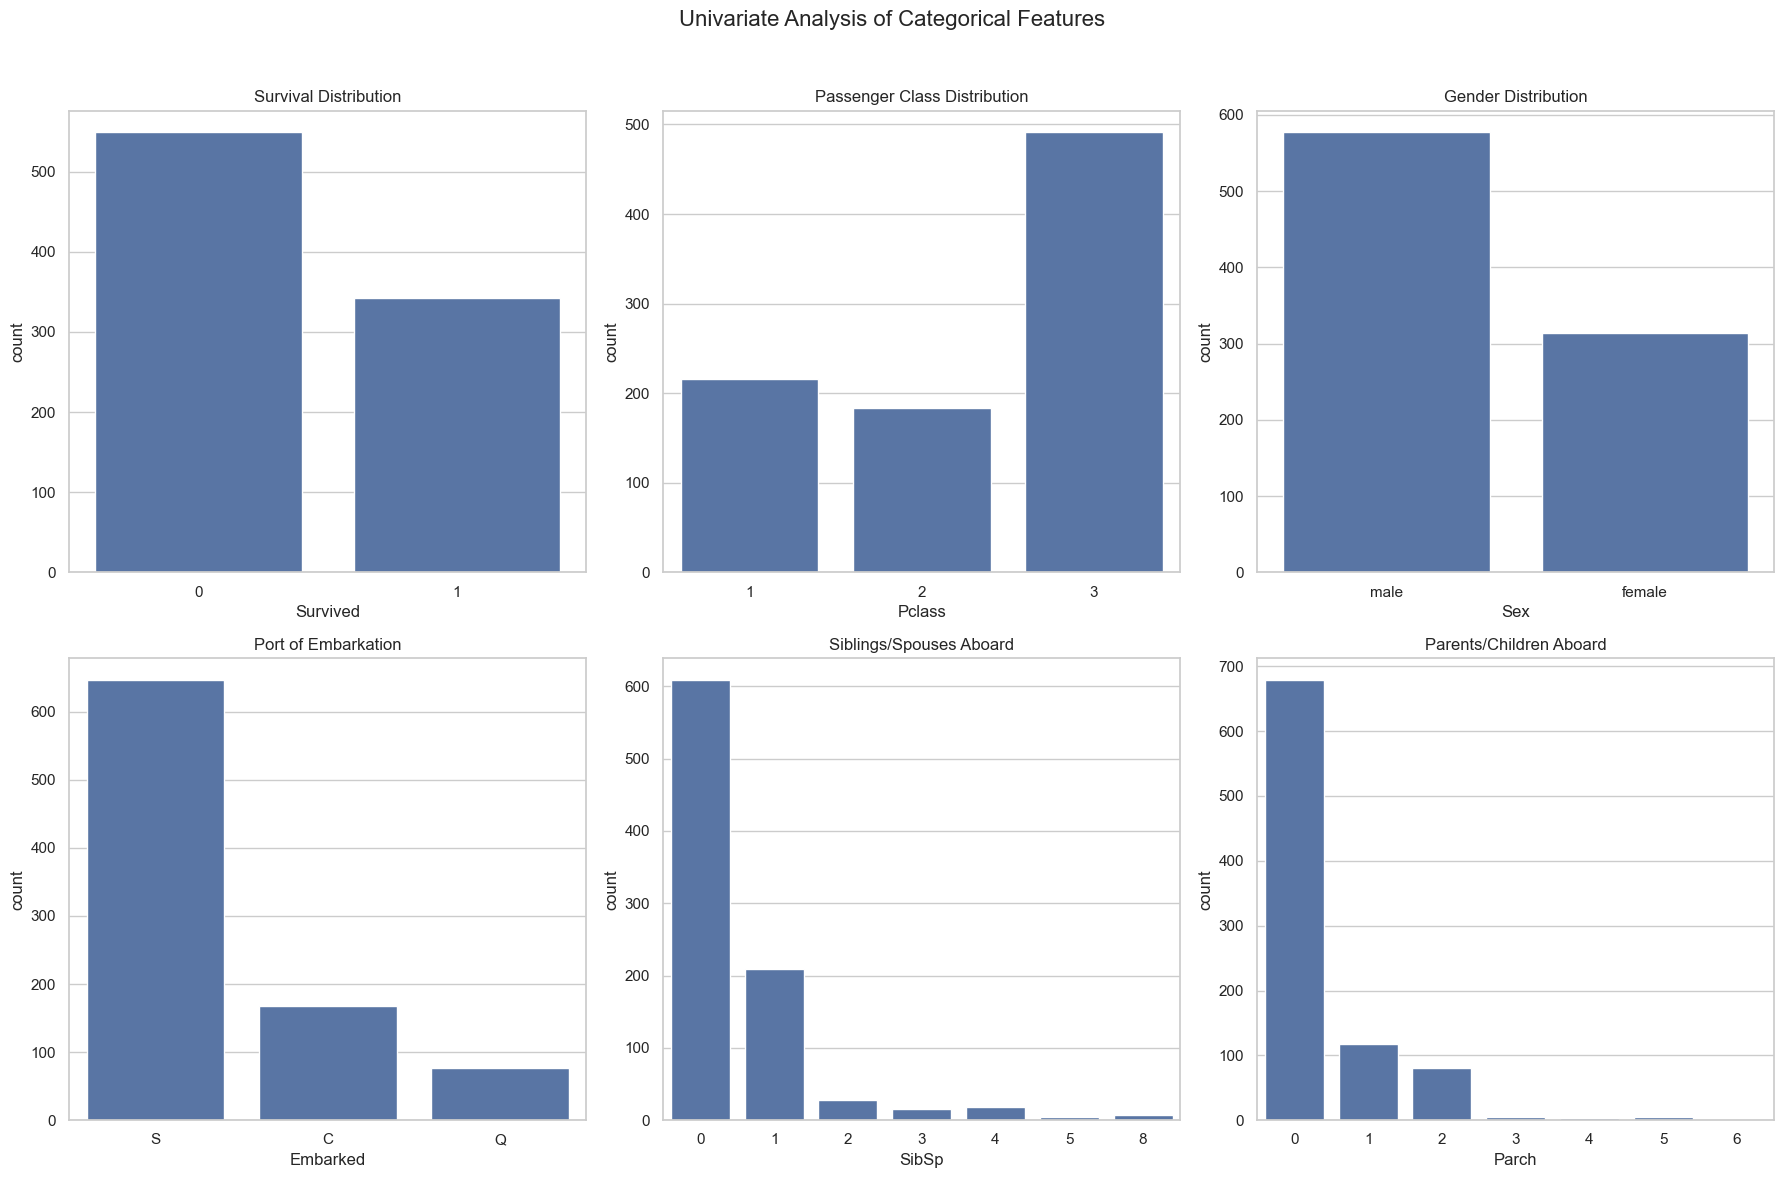

In [20]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observations:**
- Over 500 passengers did not survive.
- The 3rd class was the most populated, followed by 1st and then 2nd.
- Significantly more males than females.
- The vast majority of passengers embarked from Southampton ('S').
- Most passengers traveled alone.

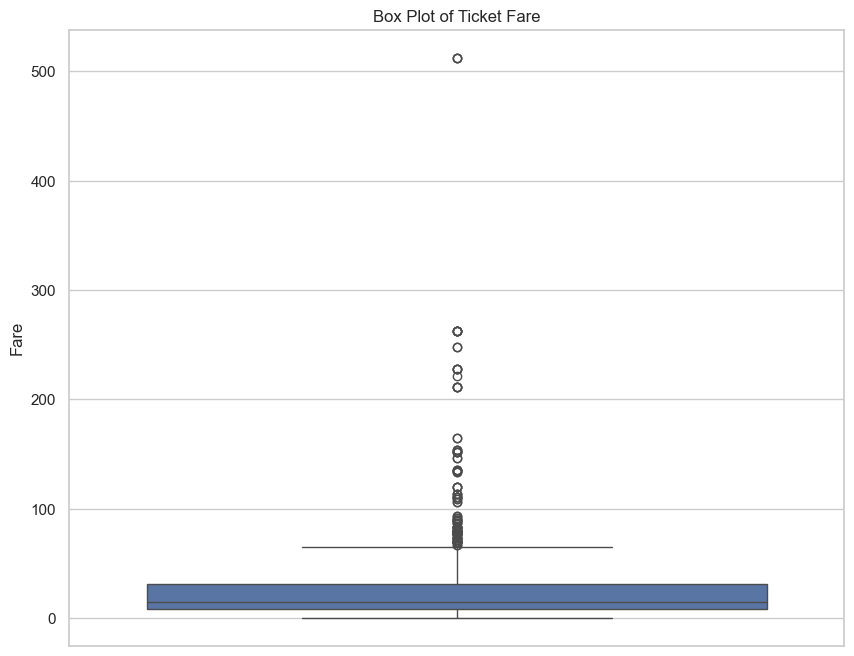

In [32]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()


Analyzing numerical features:


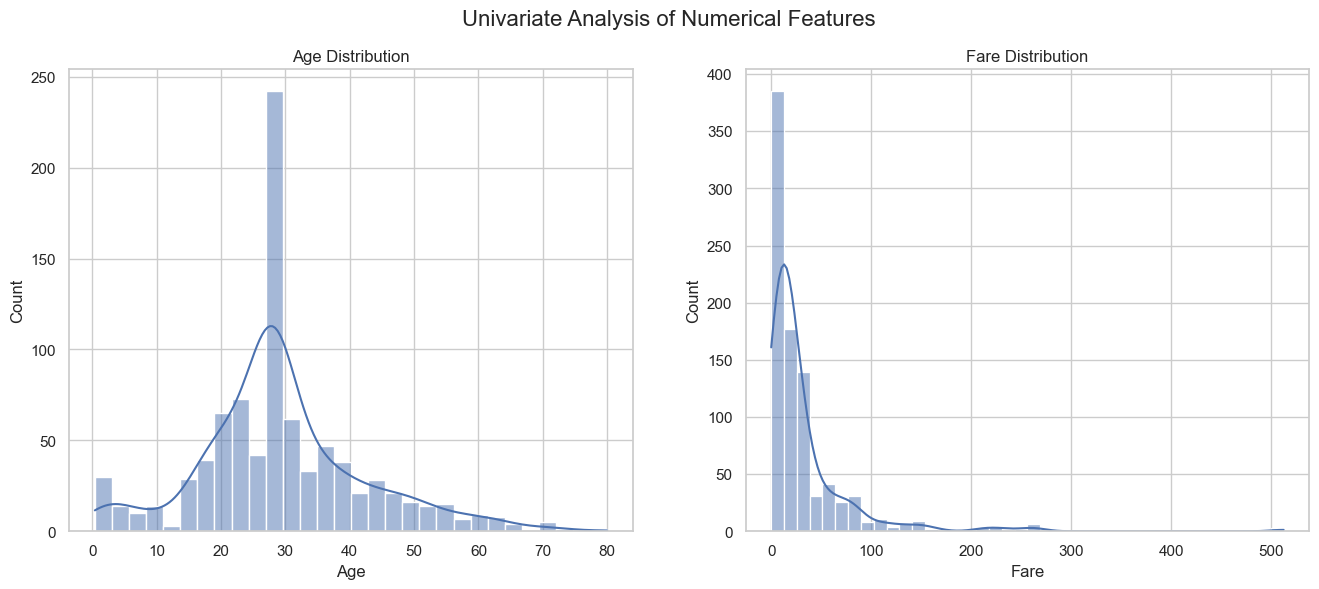

In [21]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

**Observations:**
- Most passengers belong to the 20-30 age range. Imputing the missing values with mean value contributes to the height of that central bar.
- Most tickets were under 50 pounds, with a few *very* expensive exceptions.

## Bivariate analysis

Exploring the relationship between two variables:
- *Categorical vs. Numerical* 
- *Categorical vs. Categorical*
- *Numerical vs. Numerical*

Bivariate Analysis: Feature vs. Survival


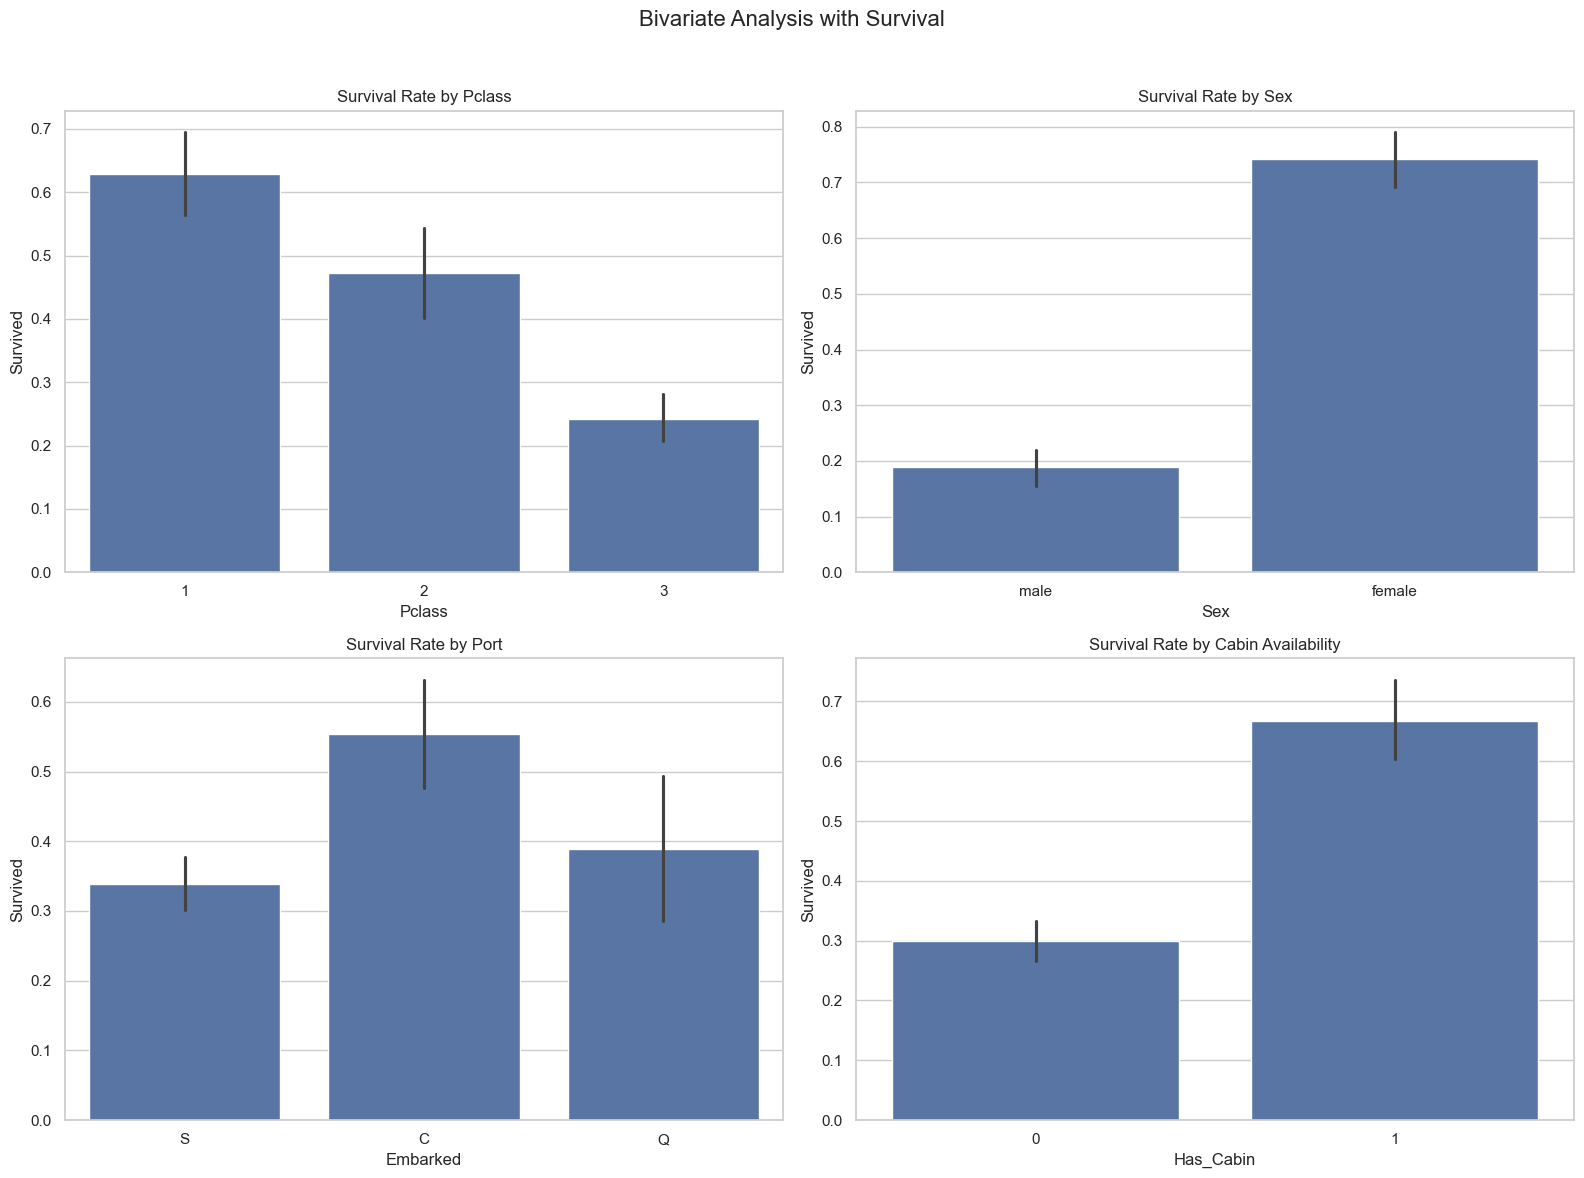

In [22]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

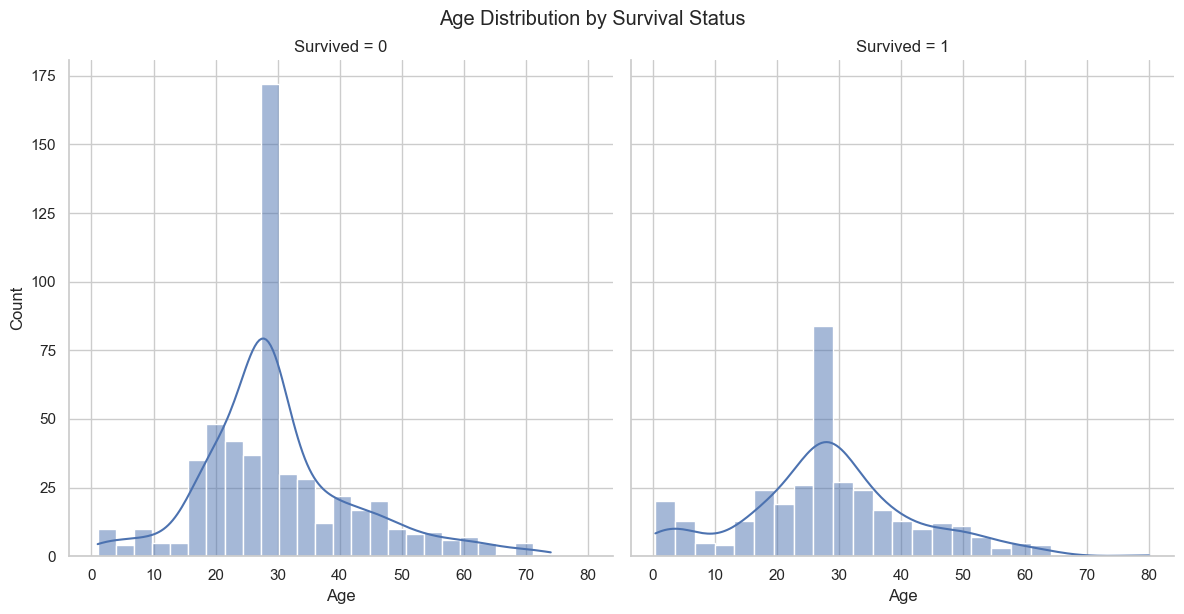

In [23]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Observations:**
- Survival rates highest among 1st class passengers (over 60%), while less than 25% of 3rd class passengers survived.
- About 75% of females survived, compared to <20% of males.
- Passengers who boarded at Cherbourg ('C') experienced higher survival rates than those from other ports.
- Having a recorded cabin number was associated with a much greater chance of survival (likely link to 1st class status).
- Infants and young children were more likely to survive.
- Most non-survivors were young adults (ages 20–40).
- None of the oldest passengers (age 80) survived.

## Feature engineering

Using domain knowledge to extract features from raw data. A good feature should be relevant to the problem and easy for a model to understand.

**Common Techniques:**
1.  *Combining Features:* Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  *Extracting from Text:* Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  *Binning:* Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

Combining features:

In [25]:
# 1. Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

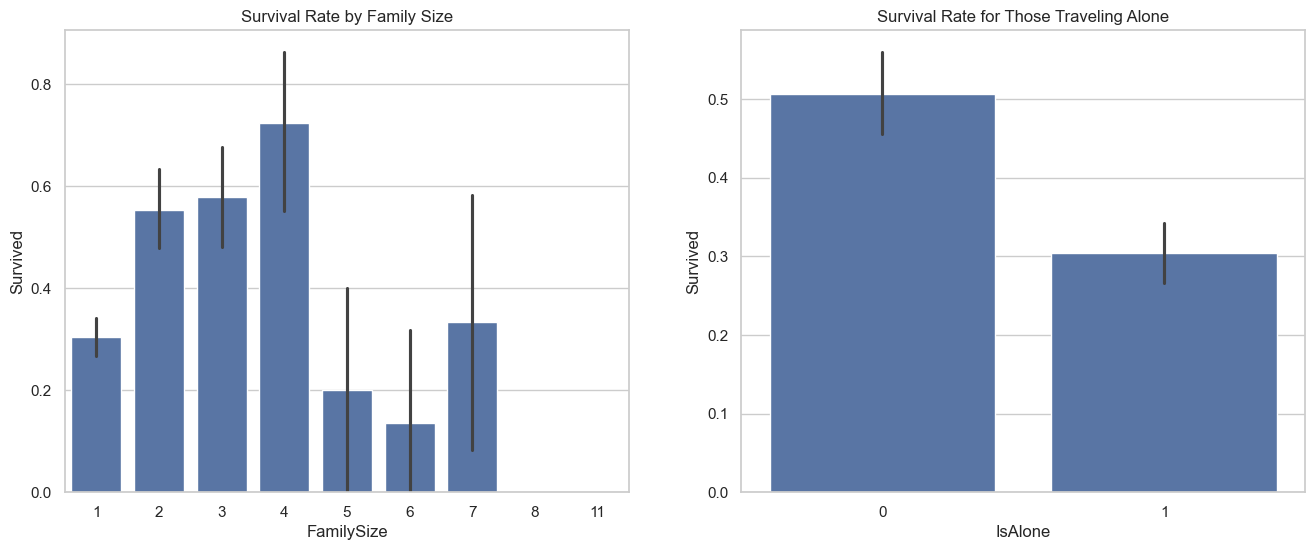

In [26]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

**Observations:**
- Passengers who were alone had a lower survival rate (~30%).
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate.

Extracting from text:

In [27]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

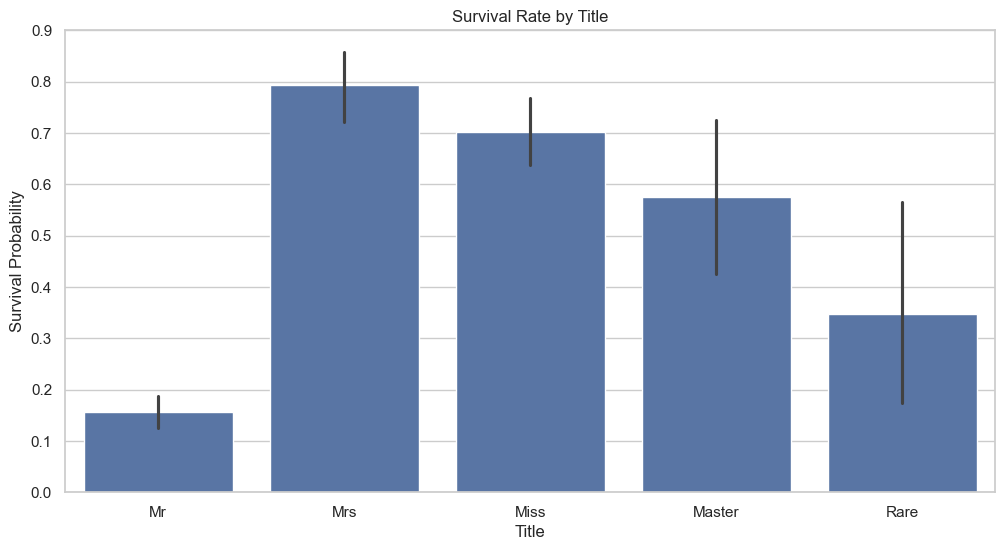

In [28]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Observations:**
- 'Mrs' and 'Miss' (females) had high survival rates
- 'Mr' (males) had a low survival rate
- 'Master' (young boys) survived much more than adult men
- 'Rare' titles (nobility/status) had mixed but generally better survival than common men

## Multivariate Analysis

Exploring the Relationship between multiple variables

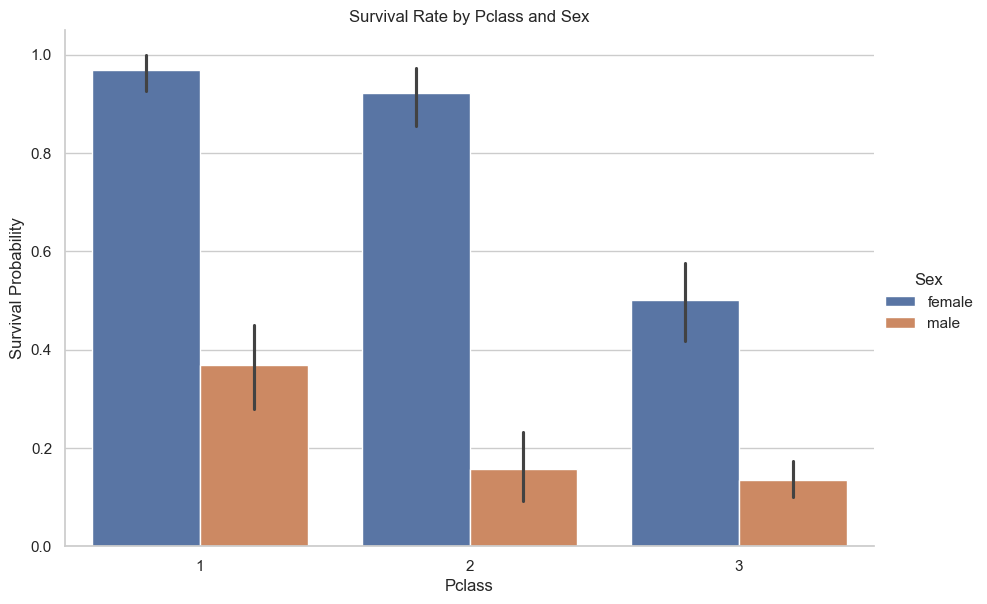

In [29]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

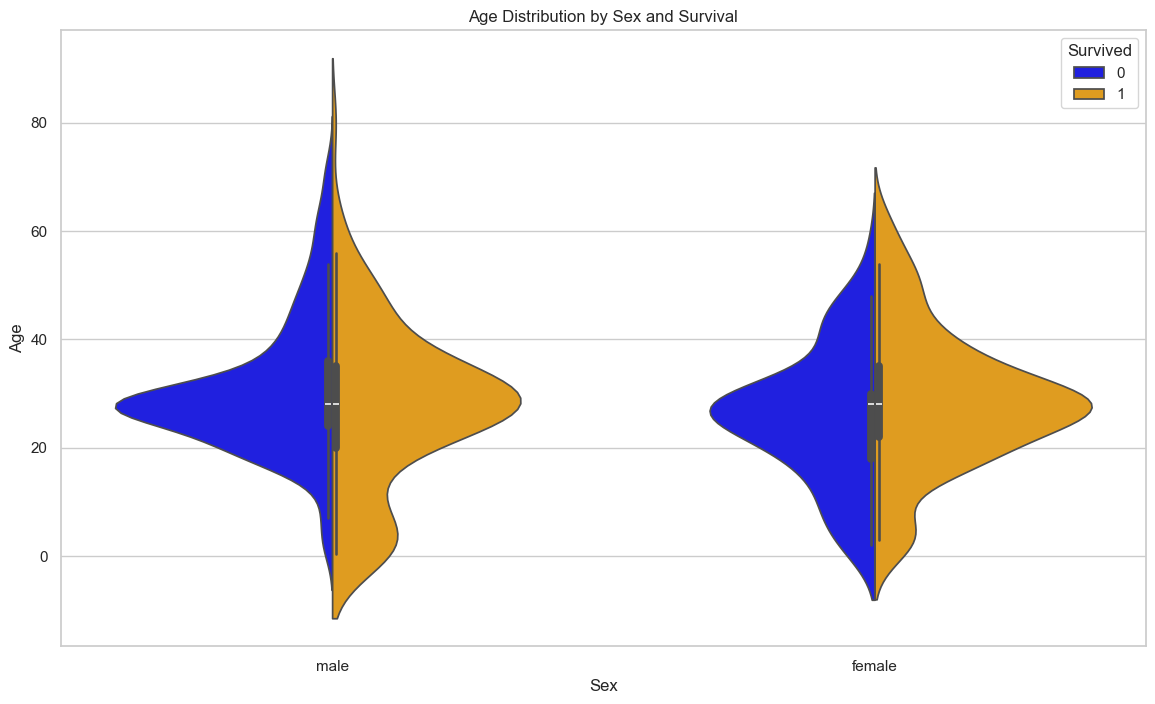

In [30]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Observations:**
- Most male survivors were young boys; most male non-survivors were aged 20–30.
- Female survivors were spread across almost all ages, showing women of any age had a good chance of survival.

## Correlation Analysis

helps understand how changes in one variable are associated with changes in another.

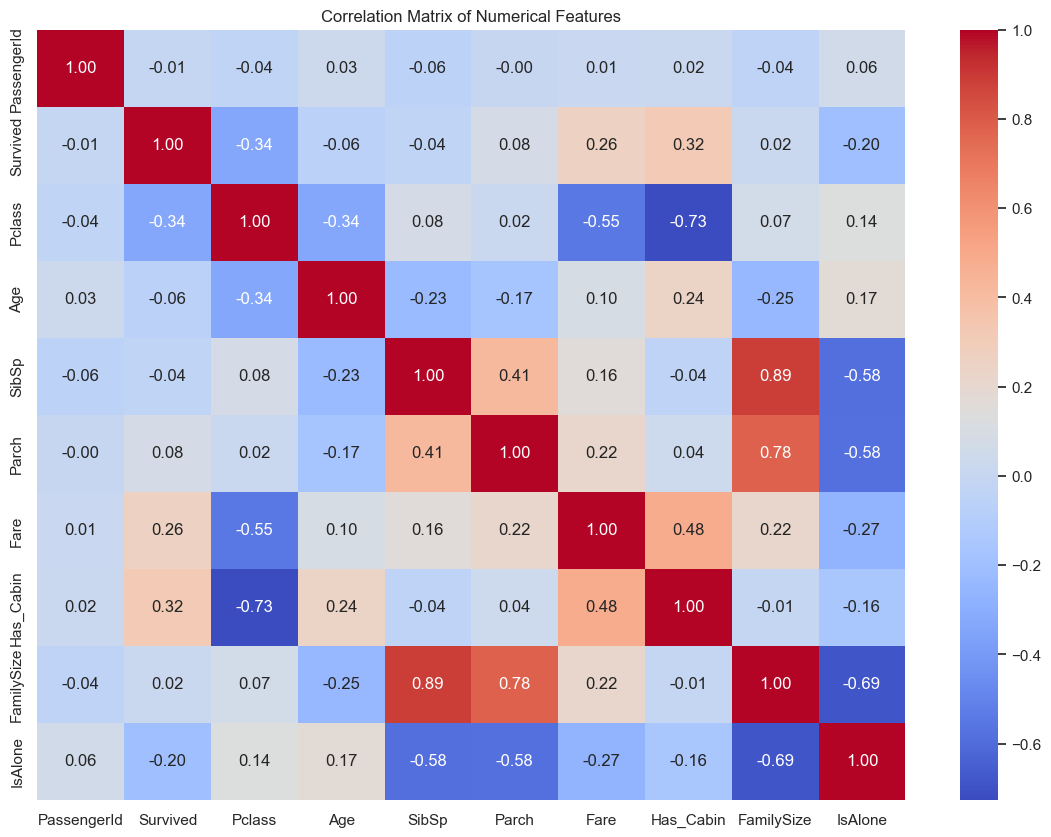

In [31]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

*Observations:**
- Survival is positively linked to higher fare and having a cabin, but negatively linked to being in a lower class or traveling alone.
- Higher class (lower Pclass number) means higher fare—these are strongly negatively correlated.
- FamilySize is highly correlated with SibSp and Parch, since it’s made from those columns.

---

# y-profiling:

- y-profiling automatically generates an in-depth data analysis report
- Summarizes data types, missing values, and distributions
- Shows correlations and potential data quality issues
- Helps understand the structure and characteristics of a dataset at a glance

In [33]:
from ydata_profiling import ProfileReport

In [34]:
profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 96.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
profile.to_file("soitsmenia_Titanic_yprofiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]